In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#22 สามารถใช้เทคนิคใดก็ได้ตามที่สอนมา ใช้ Decision Tree Algorithm แล้วให้ผลลัพธ์ที่ดีที่สุดที่เป็นไปได้ (อาจจะรวม Grid Search กับ Normalization/Standardization ?)
df = pd.read_csv('cleaned_data.csv')
df

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
0,22,female,2,own,little,5951,48,radio/TV,bad
1,49,male,1,own,little,2096,12,education,good
2,45,male,2,free,little,7882,42,furniture/equipment,good
3,53,male,2,free,little,4870,24,car,bad
4,53,male,2,own,quite rich,2835,24,furniture/equipment,good
...,...,...,...,...,...,...,...,...,...
812,31,female,1,own,little,1736,12,furniture/equipment,good
813,40,male,3,own,little,3857,30,car,good
814,38,male,2,own,little,804,12,radio/TV,good
815,23,male,2,free,little,1845,45,radio/TV,bad


In [3]:
df = pd.get_dummies(df, drop_first=True)
df

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_good
0,22,2,5951,48,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,49,1,2096,12,1,1,0,0,0,0,0,0,1,0,0,0,0,1
2,45,2,7882,42,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,53,2,4870,24,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,53,2,2835,24,1,1,0,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,31,1,1736,12,0,1,0,0,0,0,0,0,0,1,0,0,0,1
813,40,3,3857,30,1,1,0,0,0,0,1,0,0,0,0,0,0,1
814,38,2,804,12,1,1,0,0,0,0,0,0,0,0,1,0,0,1
815,23,2,1845,45,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [4]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df_minmax = min_max_scaler.fit_transform(df)
df_minmax

array([[0.05357143, 0.66666667, 0.31368989, ..., 0.        , 0.        ,
        0.        ],
       [0.53571429, 0.33333333, 0.10157368, ..., 0.        , 0.        ,
        1.        ],
       [0.46428571, 0.66666667, 0.41994057, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.33928571, 0.66666667, 0.03048311, ..., 0.        , 0.        ,
        1.        ],
       [0.07142857, 0.66666667, 0.08776274, ..., 0.        , 0.        ,
        0.        ],
       [0.14285714, 0.66666667, 0.23803235, ..., 0.        , 0.        ,
        1.        ]])

In [5]:
df_norm = pd.DataFrame(df_minmax, columns=df.columns)
df_norm

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_good
0,0.053571,0.666667,0.313690,0.647059,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.535714,0.333333,0.101574,0.117647,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.464286,0.666667,0.419941,0.558824,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.607143,0.666667,0.254209,0.294118,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.607143,0.666667,0.142236,0.294118,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,0.214286,0.333333,0.081765,0.117647,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
813,0.375000,1.000000,0.198470,0.382353,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
814,0.339286,0.666667,0.030483,0.117647,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
815,0.071429,0.666667,0.087763,0.602941,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [6]:
X_norm = df_norm.drop(['Risk_good'], axis=1)
y_norm = df_norm['Risk_good']
X_norm

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0.053571,0.666667,0.313690,0.647059,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.535714,0.333333,0.101574,0.117647,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.464286,0.666667,0.419941,0.558824,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.607143,0.666667,0.254209,0.294118,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.607143,0.666667,0.142236,0.294118,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,0.214286,0.333333,0.081765,0.117647,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
813,0.375000,1.000000,0.198470,0.382353,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
814,0.339286,0.666667,0.030483,0.117647,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
815,0.071429,0.666667,0.087763,0.602941,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
from sklearn.model_selection import train_test_split
X_train_norm, X_test_norm, y_train_norm, y_test_norm =train_test_split(X_norm, y_norm, test_size=0.2, random_state=35)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_combination = {'max_depth':[4,8,16,32,64], 'min_samples_leaf':[1,2,4,8,12,16], 'n_estimators':[10,20,50,100]}
grid_search = GridSearchCV(RandomForestClassifier(), param_combination, verbose=1)

In [9]:
grid_search.fit(X_train_norm, y_train_norm)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  1.5min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [10]:
grid_search.best_params_

{'max_depth': 16, 'min_samples_leaf': 8, 'n_estimators': 20}

In [11]:
predicted = grid_search.predict(X_test_norm)

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
confusion_matrix(y_test_norm, predicted)

array([[  9,  39],
       [  9, 107]], dtype=int64)

In [13]:
print('Random Forest+normalization+HT')
print('Accuracy = {:.4f}'.format(accuracy_score(y_test_norm,predicted)))
print('Precision ={:.4f}'.format(precision_score(y_test_norm,predicted)))
print('Recall = {:.4f}'.format(recall_score(y_test_norm,predicted)))
print('F1 score ={:.4f}'.format(f1_score(y_test_norm,predicted)))

Random Forest+normalization+HT
Accuracy = 0.7073
Precision =0.7329
Recall = 0.9224
F1 score =0.8168


In [14]:
# ได้ผลลัพธ์พอๆกับ Random Forest+HT เลยครับ อาจจะเป็นเพราะการทำ feature scaling ไม่ค่อยมีผลต่อ tree-based model อยู่แล้ว

In [41]:
#23 สร้าง bar chart เปรียบเทียบค่า Accuracy, F1 score, Recall, Precision ของ Decision Tree Model ที่ดีที่สุด กับ Random Forest Model ที่ดีที่สุด
dict = {'metrics':['Accuracy','Precision','Recall','F1score','Accuracy','Precision','Recall','F1score'], 'model':['DT+HT','DT+HT','DT+HT','DT+HT','RF+HT','RF+HT','RF+HT','RF+HT'],'score':['71.95','74.31','92.24','82.31','73.78','74.17','96.55','83.90']}
df_best_score = pd.DataFrame(data=dict)
df_best_score

,metrics,model,score
0,Accuracy,DT+HT,71.95
1,Precision,DT+HT,74.31
2,Recall,DT+HT,92.24
3,F1score,DT+HT,82.31
4,Accuracy,RF+HT,73.78
5,Precision,RF+HT,74.17
6,Recall,RF+HT,96.55
7,F1score,RF+HT,83.90


Text(0.5, 1.0, 'Best DT vs Best RF')

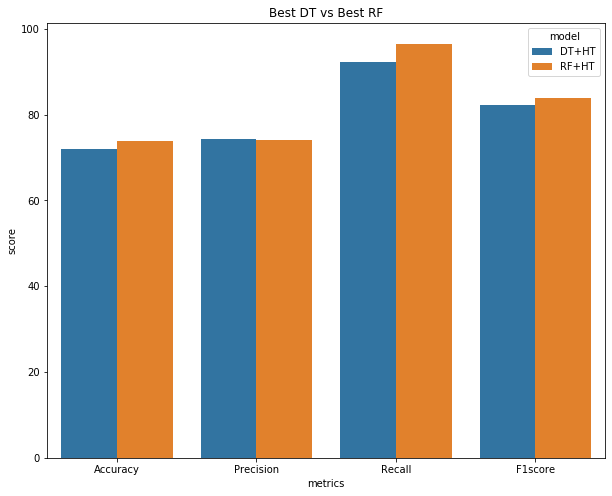

In [44]:
plt.figure(figsize=(10,8))
sns.barplot(x='metrics', y='score',hue='model', data=df_best_score)
plt.title('Best DT vs Best RF')